1. Resmaple() method to restructure date_time data

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv')
df.head(15)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 03-PM,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
6,2020-03-13 02-PM,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
7,2020-03-13 01-PM,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
8,2020-03-13 12-PM,ETHUSD,128.93,134.60,126.95,131.35,3906590.52
9,2020-03-13 11-AM,ETHUSD,132.60,133.17,126.01,128.93,3311080.29


In [2]:
df.isnull().any()

Date      False
Symbol    False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

### Conversion into date_time

Use format arguments to change the date_time format so that Pandas can parse them. 

More at: 1. https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
         2. https://strftime.org/

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d %I-%p')

In [4]:
# Checking dtypeof 'Date' Column
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [5]:
# We can use inbuilt methods like day(), day_name(), month(), month_name() 
print(df.loc[0, 'Date'].day)
display(df.loc[0, 'Date'].day_name())
display(df.loc[0, 'Date'].month)
display(df.loc[0, 'Date'].month_name())  
display(df.loc[0, 'Date'].week)
display(df.loc[0, 'Date'].weekday())

13


'Friday'

3

'March'

11

4

In [6]:
# In order to get day name of each date in the column,
# first grab the Date Series and access the 'dt' class on the series object
# and access the date_time method that way
# this method is similar to calling str class for string methods on series objects. 
display(df['Date'].dt.day_name())

# Displaying total no of each value
display(df['Date'].dt.day_name().value_counts())

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

Thursday     3384
Wednesday    3384
Tuesday      3384
Monday       3384
Sunday       3384
Friday       3381
Saturday     3373
Name: Date, dtype: int64

In [7]:
# to get oldest and newest date_time value
display(df['Date'].min(), df['Date'].max())

Timestamp('2017-07-01 11:00:00')

Timestamp('2020-03-13 20:00:00')

In [8]:
# Can subtract between dates too
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [9]:
# Filtering data based on a particular timeline
df[(df['Date']  >= '2019') & (df['Date'] < '2020')]

,Date,Symbol,Open,High,Low,Close,Volume
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99


In [10]:
df[(df['Date']  >= '2020')]

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40


In [11]:
# Similarly we can use pd.to_datetime() expression 
# to filter out the data
df[df['Date'] >= pd.to_datetime('2020-01-01')]

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40


In [12]:
df[(df['Date'] > pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))]

,Date,Symbol,Open,High,Low,Close,Volume
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...,...
10503,2019-01-01 05:00:00,ETHUSD,131.96,132.58,131.96,132.48,317851.90
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43


In [13]:
# Slicing 
# We can slice the datetime columns to
df.set_index('Date', inplace= True)

In [15]:
df.loc['2018':'2019']  # indexing using only the year

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...
2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69
2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11
2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37


In [17]:
temp_df = df.loc['2018-01':'2018-05']  # indexing using only the year
temp_df

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2018-05-31 23:00:00,ETHUSD,572.32,577.10,572.18,577.10,1625346.46
2018-05-31 22:00:00,ETHUSD,584.94,584.94,566.80,572.32,3266567.35
2018-05-31 21:00:00,ETHUSD,581.08,589.00,579.02,584.94,3797271.77
2018-05-31 20:00:00,ETHUSD,575.01,587.00,573.55,581.08,6694062.05
2018-05-31 19:00:00,ETHUSD,579.57,579.78,575.00,575.01,3435419.19
...,...,...,...,...,...,...
2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69
2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11
2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37


In [18]:
# Average Etherium price for that given time period
temp_df['Close'].mean()

754.9236672185431

In [29]:
# Getting highest and lowest Etherium price for a given date
print(temp_df.loc['2018-02-13']['High'].max())

print(temp_df.loc['2018-02-13']['High'].min())

867.48
835.3


In [42]:
# Resamping or restructuring the Date_time data by each day
temp_df.resample('1D').max()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-01,ETHUSD,761.68,764.97,754.99,761.68,5791670.55
2018-01-02,ETHUSD,869.93,878.50,865.93,869.93,48006289.38
2018-01-03,ETHUSD,943.39,949.98,932.00,943.39,30047935.88
2018-01-04,ETHUSD,993.21,994.89,983.00,993.21,22105369.76
2018-01-05,ETHUSD,1007.20,1015.00,999.99,1007.20,22845610.92
...,...,...,...,...,...,...
2018-05-27,ETHUSD,587.42,589.50,582.58,587.42,3554691.28
2018-05-28,ETHUSD,571.20,575.00,570.50,571.20,9765781.96
2018-05-29,ETHUSD,569.23,573.53,565.23,569.23,8406659.01


In [43]:
# Resamping or restructuring the Date_time data by each day
eth_high = temp_df['High'].resample('1D').max()
eth_high.head(15)

Date
2018-01-01     764.97
2018-01-02     878.50
2018-01-03     949.98
2018-01-04     994.89
2018-01-05    1015.00
2018-01-06    1009.11
2018-01-07    1118.30
2018-01-08    1228.99
2018-01-09    1297.58
2018-01-10    1386.99
2018-01-11    1335.00
2018-01-12    1285.00
2018-01-13    1419.96
2018-01-14    1389.11
2018-01-15    1380.97
Freq: D, Name: High, dtype: float64

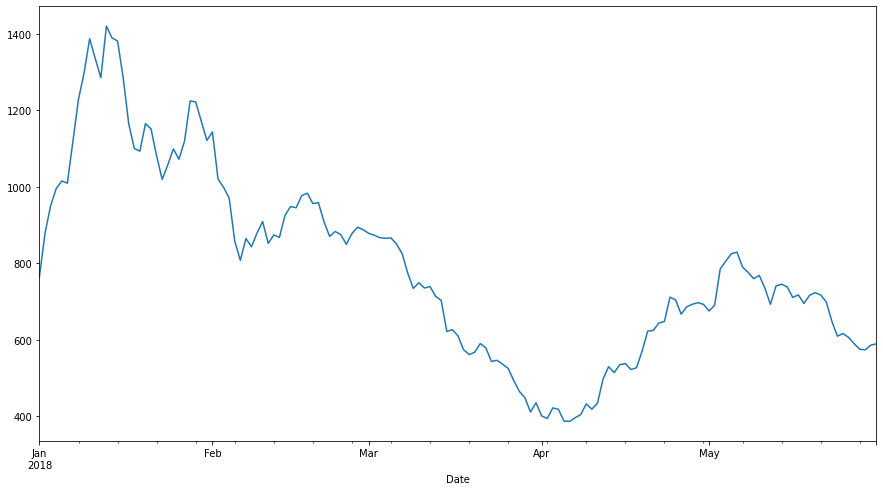

In [41]:
import matplotlib.pyplot as plt
eth_high.plot(kind= 'line', figsize= (15,8))
plt.show()

In [44]:
df.resample('1W').max()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2017-07-02,ETHUSD,292.54,293.73,284.87,292.54,7081816.11
2017-07-09,ETHUSD,285.00,285.00,282.31,282.58,6082287.50
2017-07-16,ETHUSD,238.81,240.33,238.00,238.47,23582117.48
2017-07-23,ETHUSD,245.55,249.40,234.97,245.55,31082353.62
2017-07-30,ETHUSD,229.96,229.99,229.60,229.96,9214814.73
...,...,...,...,...,...,...
2020-02-16,ETHUSD,286.39,290.00,285.10,286.39,13323454.31
2020-02-23,ETHUSD,285.30,287.13,282.00,285.30,12085035.32
2020-03-01,ETHUSD,276.91,278.13,274.28,276.91,19074673.60
